# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: ZUHDI AZIZI
- Email: shineyvampire@gmail.com
- Id Dicoding: judddd

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

### Menyiapkan data yang akan diguankan

## Data Understanding

MELOAD DATA YANG DIBUTUHKAN

In [2]:
df = pd.read_csv('employee_data.csv')

MELIHAT STRUKTUR DAN ISI DATA

In [3]:
df.head(5)

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

PENGECEKAN DATA

In [5]:
print(df.isnull().sum())

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [6]:
print(df.duplicated().sum())

0


In [7]:
df.describe(include="all")

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1043,NaN,961,NaN,NaN,606,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,735.500000,36.923810,0.169187,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


<Axes: xlabel='Attrition', ylabel='count'>

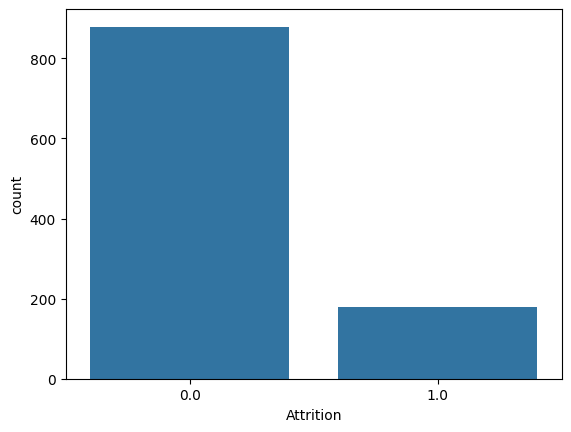

In [8]:
sns.countplot(df, x="Attrition")

In [9]:
kolom_kategori = df.select_dtypes(include='object').columns
for col in kolom_kategori:
    print(f"\n{col}: {df[col].unique()}")


BusinessTravel: ['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']

Department: ['Human Resources' 'Research & Development' 'Sales']

EducationField: ['Other' 'Medical' 'Life Sciences' 'Marketing' 'Technical Degree'
 'Human Resources']

Gender: ['Male' 'Female']

JobRole: ['Human Resources' 'Healthcare Representative' 'Research Scientist'
 'Sales Executive' 'Manager' 'Laboratory Technician' 'Research Director'
 'Manufacturing Director' 'Sales Representative']

MaritalStatus: ['Married' 'Single' 'Divorced']

Over18: ['Y']

OverTime: ['Yes' 'No']


HEATMAP SETELAH ENCODING DAN PENGHAPUSAN DATA NULL

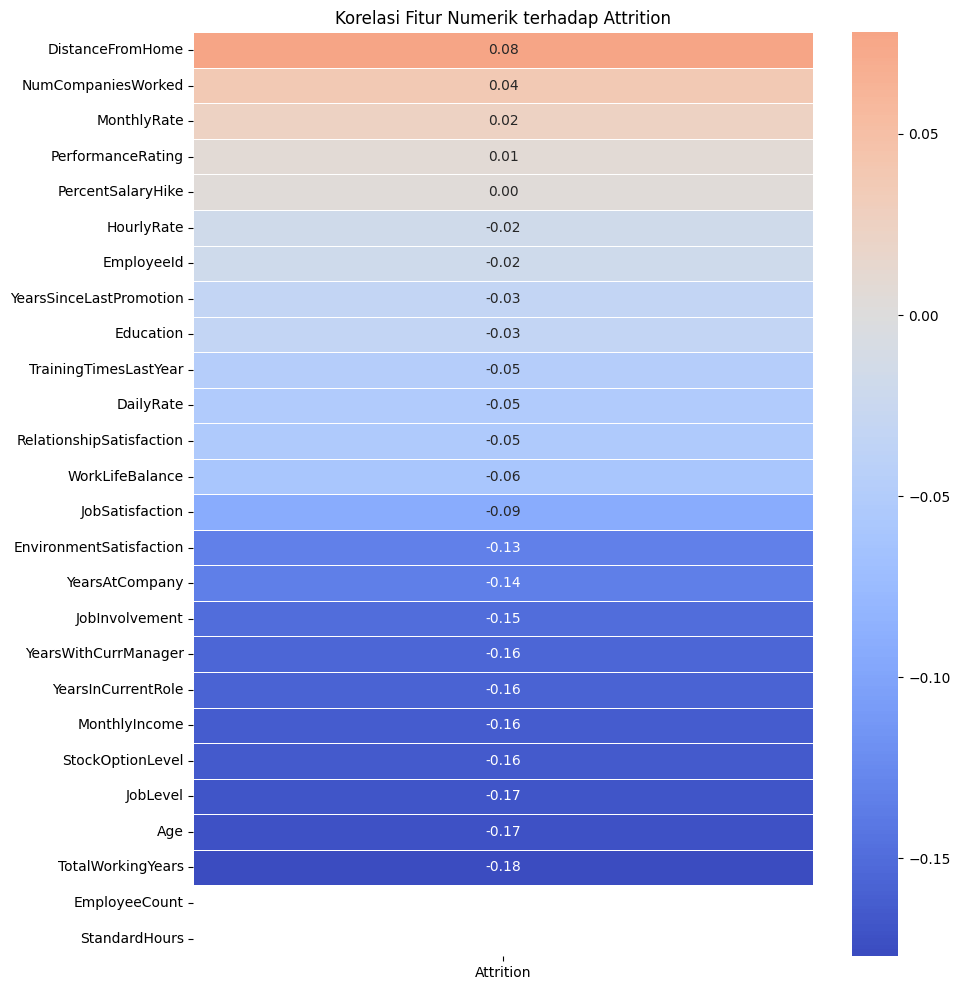

In [10]:
# Ambil hanya kolom numerik
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Korelasi dengan Attrition
focused_corr = df_numeric.corr()['Attrition'].drop('Attrition').sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 12))
sns.heatmap(focused_corr.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=0)
plt.title("Korelasi Fitur Numerik terhadap Attrition")
plt.show()


## Data Preparation / Preprocessing

MENGHAPUS DATA NULL DAN KOLOM TIDAK RELEVAN

In [11]:
df = df.dropna()

In [12]:
df = df.drop(columns=['EmployeeId', 'Over18', 'StandardHours', 'EmployeeCount'])

In [13]:
df.to_csv('employee_fix.csv', index=False)

ENCODING

In [14]:
# Lebl Encoding
binary_col = ['Gender', 'OverTime']
for col in binary_col:
    df[col] = df[col].map({df[col].unique()[0]: 0, df[col].unique()[1]: 1})

# One-Hot Encoding
multi_col = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
df = pd.get_dummies(df, columns=multi_col, drop_first=True, dtype=int)

In [17]:
# Hitung korelasi
correlation = df.corr(numeric_only=True)['Attrition'].sort_values(ascending=False)

# Ambil fitur dengan korelasi dengan attrition >= threshold tertentu
fitur_pilih = correlation[abs(correlation) >= 0.1].drop(labels=['Attrition'], errors='ignore').index.tolist()

print("Fitur yang dipilih:", fitur_pilih)

Fitur yang dipilih: ['OverTime', 'MaritalStatus_Single', 'JobRole_Sales Representative', 'JobRole_Laboratory Technician', 'BusinessTravel_Travel_Frequently', 'EnvironmentSatisfaction', 'YearsAtCompany', 'JobInvolvement', 'YearsWithCurrManager', 'YearsInCurrentRole', 'MonthlyIncome', 'StockOptionLevel', 'JobLevel', 'Age', 'TotalWorkingYears']


In [18]:
X = df[fitur_pilih]
y = df['Attrition']

SAMPLING

In [19]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

SPLIT

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

## Modeling

In [21]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

## Evaluation

In [22]:
y_pred = rf_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[152  24]
 [ 17 159]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88       176
         1.0       0.87      0.90      0.89       176

    accuracy                           0.88       352
   macro avg       0.88      0.88      0.88       352
weighted avg       0.88      0.88      0.88       352



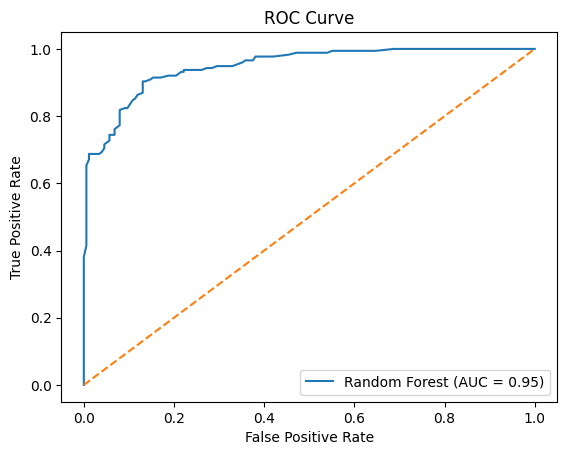

In [23]:
y_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import classification_report

print("Training Report:")
print(classification_report(y_train, rf_model.predict(X_train)))

print("Testing Report:")
print(classification_report(y_test, rf_model.predict(X_test)))


Training Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       703
         1.0       1.00      1.00      1.00       703

    accuracy                           1.00      1406
   macro avg       1.00      1.00      1.00      1406
weighted avg       1.00      1.00      1.00      1406

Testing Report:
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88       176
         1.0       0.87      0.90      0.89       176

    accuracy                           0.88       352
   macro avg       0.88      0.88      0.88       352
weighted avg       0.88      0.88      0.88       352



MENCOBA PREDIKSI

OverTime: Masukan 1 untuk ya 0 untuk tidak

MaritalStatus_Single: Masukan 1 untuk ya 0 untuk tidak

JobRole_Sales Representative: Masukan 1 untuk ya 0 untuk tidak

JobRole_Laboratory Technician: Masukan 1 untuk ya 0 untuk tidak

BusinessTravel_Travel_Frequently: Masukan 1 untuk ya 0 untuk tidak

EnvironmentSatisfaction: 1-Low, 2-Medium, 3-High, 4-Very High

YearsAtCompany: berapa tahun

JobInvolvement: 1-Low, 2-Medium, 3-High, 4-Very High

YearsWithCurrManager: berapa tahun

YearsInCurrentRole: berapa tahun

MonthlyIncome: masukkan gaji

StockOptionLevel:  Stock Option Level

JobLevel: Level of job (1 to 5)

Age: Age

TotalWorkingYears: berapa tahun


In [25]:
new_data = {
    'OverTime': [1],
    'MaritalStatus_Single': [0],
    'JobRole_Sales Representative': [0],
    'JobRole_Laboratory Technician': [1],
    'BusinessTravel_Travel_Frequently': [1],
    'EnvironmentSatisfaction': [2],
    'YearsAtCompany': [2],
    'JobInvolvement': [2],
    'YearsWithCurrManager': [1],
    'YearsInCurrentRole': [1],
    'MonthlyIncome': [2500],
    'StockOptionLevel': [1],
    'JobLevel': [2],
    'Age': [19],
    'TotalWorkingYears': [2]
}

# Convert data input menjadi DataFrame
input_df = pd.DataFrame(new_data)

# Lakukan prediksi
prediksi = rf_model.predict(input_df)

# Tampilkan hasil prediksi
print("Hasil Prediksi (Attrition):", prediksi)

Hasil Prediksi (Attrition): [1.]
